<a href="https://colab.research.google.com/github/alowjw08/2022LoLProAnalysis/blob/main/LoL_Analysis_2022_Exploring_how_Side_Selection_and_Early_Game_Statistics_Affect_Professional_Match_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Allison Low 23051818/1 OCC1 IDS Individual Assignment**

# Step 1: Data Loading

In [ ]:
#import pandas and assign as pd
import pandas as pd
#load dataset (in csv format) into pandas dataframe
df = pd.read_csv('C:/Users/alowj/Documents/23051818_AllisonLowOCC1_IDS_Assignment/2022_LoL_esports_match_data_from_OraclesElixir.csv', low_memory=False)


In [ ]:
#show info for all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Step 2: Initial Data Exploration

In [ ]:
#display first 5 rows of dataset
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,top,Soboro,oe:player:38e0af7278d6769d0c81d7c4b47ac1e,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,3,2,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15768.0,552.2942,0.278784,1072.3993,777.7933,8.0,0.2802,6.0,0.2102,5.0,26.0,0.9107,10934,7164.0,250.9282,0.253859,10275.0,NaN,231.0,220.0,11.0,NaN,NaN,8.0911,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,jng,Raptor,oe:player:637ed20b1e41be1c51bd1a4cb211357,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,5,6,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11765.0,412.0841,0.208009,944.2732,650.1576,6.0,0.2102,18.0,0.6305,6.0,48.0,1.6813,9138,5368.0,188.0210,0.190220,8750.0,NaN,148.0,33.0,115.0,NaN,NaN,5.1839,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,mid,Feisty,oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,2,3,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14258.0,499.4046,0.252086,581.6462,227.7758,19.0,0.6655,7.0,0.2452,7.0,29.0,1.0158,9715,5945.0,208.2312,0.210665,8725.0,NaN,193.0,177.0,16.0,NaN,NaN,6.7601,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,bot,Gamin,oe:player:998b3e49b01ecc41eacc392477a98cf,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,4,2,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,11

In [ ]:
#acquire info of dataframe such as number of rows, columns, datatypes etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149400 entries, 0 to 149399
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(93), int64(12), object(18)
memory usage: 140.2+ MB


In [ ]:
#fastest way to get statistical summary of dataframe
df.describe()

,year,playoffs,game,patch,participantid,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
count,149400.000000,149400.000000,149400.000000,149292.000000,149400.000000,149400.000000,149400.000000,149400.000000,149400.000000,149400.000000,149400.000000,149400.000000,127572.000000,127572.000000,127572.000000,127572.000000,131208.000000,124490.000000,106310.000000,106310.000000,149400.000000,149400.000000,21262.000000,24900.000000,24900.000000,21174.000000,21174.000000,21262.000000,21262.000000,21262.000000,21262.000000,21174.000000,21174.000000,4292.000000,21262.000000,21262.000000,21262.000000,21262.000000,21262.000000,21262.000000,127500.000000,127500.000000,21262.000000,24900.000000,24900.000000,21258.000000,21262.000000,21174.000000,21174.000000,127938.000000,127938.000000,149388.000000,149388.000000,124490.000000,149388.000000,127572.000000,149388.000000,149388.000000,149388.000000,149388.000000,149388.000000,149388.000000,149388.000000,149400.000000,149398.000000,149398.000000,124500.000000,149388.000000,24898.000000,124500.000000,145752.000000,149388.000000,22344.000000,22344.000000,145762.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.00000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.00000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000
mean,2022.028032,0.171165,1.514297,12.088969,29.583333,1896.021124,0.499920,4.828447,4.838086,10.774779,14.485341,14.514257,0.564246,0.102468,0.017371,0.003230,0.291781,0.099968,0.143194,0.100000,0.465864,0.931727,0.499906,2.235141,2.235141,2.194295,2.194295,0.437823,0.432932,0.435095,0.432227,0.026636,0.429489,2.197810,0.053664,0.053664,0.499859,0.986737,0.986737,0.473803,0.240243,0.240243,0.500000,6.044699,6.044699,0.500000,0.499906,4.692170,4.692170,0.327119,0.327119,22243.550854,697.293760,0.200000,978.346380,869.135973,32.378089,1.011945,14.549790,0.450191,12.427236,75.002417,2.337174,18983.141647,12077.274361,382.644218,0.200000,17569.061290,0.000000,199.123847,254.140609,66.191642,43.514545,6.072816,10.029959,5229.500329,6066.512197,104.834509,5229.500329,6066.512197,104.834509,0.00000,0.000000,0.000000,0.727715,1.112391,0.730192,0.727715,1.112391,0.730192,8275.397391,9803.353291,167.495046,8275.397391,9803.353291,167.495046,0.00000,0.000000,0.000000,1.358025,2.195811,1.361365,1.358025,2.195811,1.361365
std,0.165065,0.376654,0.888933,0.055340,57.650660,337.967171,0.500002,5.863152,5.611217,12.793654,7.528082,7.526759,1.029034,0.350415,0.136689,0.057013,0.454584,0.299958,0.350273,0.300001,0.258225,0.305263,0.500012,1.374117,1.374117,1.330812,1.330812,0.705469,0.699192,0.704155,0.705086,0.202821,0.700521,1.345566,0.237947,0.237

In [ ]:
#list all columns of dataframe
list(df)

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'opp_turretplates',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampions',
 'dpm',
 'd

Missing Values:

In [ ]:
#determine and sum up number of null values for each column
missing_values = df.isnull().sum()
print(f"Missing Values: \n{missing_values}")

Missing Values: 
gameid                           0
datacompleteness                 0
url                         126984
league                           0
year                             0
split                        39972
playoffs                         0
date                             0
game                             0
patch                          108
participantid                    0
side                             0
position                         0
playername                   24900
playerid                     27069
teamname                        54
teamid                        2124
champion                     24900
ban1                          2334
ban2                          2202
ban3                          2520
ban4                          2388
ban5                          2712
gamelength                       0
result                           0
kills                            0
deaths                           0
assists                          0
tea

**Target Variable:**

result: the result of the match, 1 is a win, 0 is a loss

#### Dataset Evaluation
>
There are 123 columns with data attributes labelled in a short and concise manner. The features can be easily comprehended.
>
There are 149400 rows of data entries, which are approximately 1214 times the number of features. It is sufficient.
>
Datatypes include floats, integers and objects.
>
There are missing values, which will be handled in step 3.
>
The summary statistics such as min, max, mean, standard deviation and quartiles are printed.

# Step 3: Data Cleaning

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#identify columns with missing values
missing_values = df.isnull().sum()
print(missing_values)

gameid                           0
datacompleteness                 0
url                         126984
league                           0
year                             0
split                        39972
playoffs                         0
date                             0
game                             0
patch                          108
participantid                    0
side                             0
position                         0
playername                   24900
playerid                     27069
teamname                        54
teamid                        2124
champion                     24900
ban1                          2334
ban2                          2202
ban3                          2520
ban4                          2388
ban5                          2712
gamelength                       0
result                           0
kills                            0
deaths                           0
assists                          0
teamkills           

In [ ]:
#drop rows where data is only partially complete
df.drop(df[df['datacompleteness'] == 'partial'].index, inplace=True)

In [ ]:
#check for null values
missing_values = df.isnull().sum()
print(missing_values)

gameid                           0
datacompleteness                 0
url                         126984
league                           0
year                             0
split                        38880
playoffs                         0
date                             0
game                             0
patch                            0
participantid                    0
side                             0
position                         0
playername                   21262
playerid                     23212
teamname                        54
teamid                        1854
champion                     21262
ban1                           318
ban2                           174
ban3                           474
ban4                           330
ban5                           606
gamelength                       0
result                           0
kills                            0
deaths                           0
assists                          0
teamkills           

In [ ]:
#drop entire columns containing null values
df.dropna(axis=1, inplace=True)

In [ ]:
#check that there are no more null values
df.isna().sum()

gameid                      0
datacompleteness            0
league                      0
year                        0
playoffs                    0
date                        0
game                        0
patch                       0
participantid               0
side                        0
position                    0
gamelength                  0
result                      0
kills                       0
deaths                      0
assists                     0
teamkills                   0
teamdeaths                  0
doublekills                 0
triplekills                 0
quadrakills                 0
pentakills                  0
firstblood                  0
team kpm                    0
ckpm                        0
damagetochampions           0
dpm                         0
damagetakenperminute        0
damagemitigatedperminute    0
wardsplaced                 0
wpm                         0
wardskilled                 0
wcpm                        0
controlwar

In [ ]:
#overview of remaining data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127572 entries, 0 to 149135
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gameid                    127572 non-null  object 
 1   datacompleteness          127572 non-null  object 
 2   league                    127572 non-null  object 
 3   year                      127572 non-null  int64  
 4   playoffs                  127572 non-null  int64  
 5   date                      127572 non-null  object 
 6   game                      127572 non-null  int64  
 7   patch                     127572 non-null  float64
 8   participantid             127572 non-null  int64  
 9   side                      127572 non-null  object 
 10  position                  127572 non-null  object 
 11  gamelength                127572 non-null  int64  
 12  result                    127572 non-null  int64  
 13  kills                     127572 non-null  int64 

Duplicate entries have been dropped.
>
Null values have been removed by:
- dropping rows where data is incomplete, this is identified through the 'datacompleteness' column.
> rows where value of datacompleteness == 'partial' are dropped
- dropping entire columns that still have null values, after ensuring that these columns are not crucial to our analysis focus

# Step 4: Data Selection and Filtering

In [ ]:
columns_to_proceed = ['side', 'result', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']
df_fil = df[columns_to_proceed]

For this analysis, we would like to investigate how certain variables affect the 'result', which is the target variable.
>
Dataset has been filtered and the variables that matches our focus are included in columns_to_proceed, and I have created a new dataframe which consists of only the selected columns (columns_to_proceed). This new dataframe is called df_fil. We will proceed with this new dataframe.
>
Basically, for this analysis we are focusing on how side selection (blue/red) affects result, and how statistics (gold, experience, creepscore, kills) at the 10 and 15 minute mark respectively affect result.

regex : regular expression to select columns that match a pattern

In [ ]:
#using regex
import re
# create subset where result is a win
subset_win=df_fil[df_fil['result'].astype(str).str.contains(r'1')]
# create subset where result is a loss (opponent wins)
subset_oppwin=df_fil[df_fil['result'].astype(str).str.contains(r'0')]

In [ ]:
df_fil.describe()

,result,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
count,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.00000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.00000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000,127572.000000
mean,0.499906,5229.500329,6066.512197,104.834509,5229.500329,6066.512197,104.834509,0.00000,0.000000,0.000000,0.727715,1.112391,0.730192,0.727715,1.112391,0.730192,8275.397391,9803.353291,167.495046,8275.397391,9803.353291,167.495046,0.00000,0.000000,0.000000,1.358025,2.195811,1.361365,1.358025,2.195811,1.361365
std,0.500002,4723.343724,5498.624790,97.861456,4723.343724,5498.624790,97.861456,806.64194,617.041847,18.345866,1.234719,1.939225,1.198944,1.234719,1.939225,1.198944,7498.946012,8886.515241,156.334641,7498.946012,8886.515241,156.334641,1612.04536,1121.340397,28.391069,2.000681,3.234781,1.936649,2.000681,3.234781,1.936649
min,0.000000,1659.000000,838.000000,0.000000,1659.000000,838.000000,0.000000,-9428.00000,-5273.000000,-127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2433.000000,1729.000000,0.000000,2433.000000,1729.000000,0.000000,-15041.00000,-10019.000000,-221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2979.000000,3064.000000,60.000000,2979.000000,3064.000000,60.000000,-356.00000,-320.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4625.000000,5130.000000,92.000000,4625.000000,5130.000000,92.000000,-683.00000,-550.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3308.000000,3928.000000,77.000000,3308.000000,3928.000000,77.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5251.000000,6395.000000,124.000000,5251.000000,6395.000000,124.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,3765.000000,4825.000000,91.000000,3765.000000,4825.000000,91.000000,356.00000,320.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6122.000000,7723.000000,146.000000,6122.000000,7723.000000,146.000000,683.00000,550.000000,13.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000
max,1.000000,22304.000000,21344.000000,392.000000,22304.000000,21344.000000,392.000000,9428.00000,5273.000000,127.000000,15.000000,35.000000,15.000000,15.000000,35.000000,15.000000,37279.000000,35006.000000,626.000000,37279.000000,35006.000000,626.000000,15041.00000,10019.000000,221.000000,28.000000,47.000000,28.000000,28.000000,47.000000,28.000000


# Step 5: Data Transformation

I would like to create 10 new columns:-
>
**1. stats_at_10**
> goldat10 + xpat10 + csat10
>
**2. oppstats_at_10**
> opp_goldat10 + opp_xpat10 + opp_csat10
>
**3. stats_diff_at 10**
> golddiffat10 + xpdiffat10 + csdiffat10
>
**4. kda_at_10**
> (killsat10 + assistsat10)/deathsat10
>
**5. oppkda_at_10**
> (opp_killsat10 + opp_assistsat10)/opp_deathsat10
>
**6. stats_at_15**
> goldat15 + xpat15 + csat15
>
**7. oppstats_at_15**
> opp_goldat15 + opp_xpat15 + opp_csat15
>
**8. stats_diff_at 15**
> golddiffat15 + xpdiffat15 + csdiffat15
>
**9. kda_at_15**
> (killsat15 + assistsat15)/deathsat15
>
**10. oppkda_at_15**
> (opp_killsat15+opp_assistsat15)/opp_deathsat15

In [ ]:
#create a copy of dataset to avoid potential issues of modifying original dataframe
#this intends to increase clarity and readability of code as well
df_c = df_fil.copy()

In [ ]:
#numpy to check for infinity and handle it in my next block of code
#specifically for calculation of kda
#kda is calculated with (kills+assists)/(deaths)
#but if deaths=0, kda appears as inf (infinity)
#hence numpy imported to handle this
import numpy as np

In [ ]:
#create 10 new columns in a copy version of the dataset
#note: for kda calculation, if deaths=0, then we perform kda=(kills+assists)

#performance at 10min
df_c['stats_at_10'] = df_fil['goldat10'] + df_fil['xpat10'] + df_fil['csat10']
df_c['oppstats_at_10'] = df_fil['opp_goldat10'] + df_fil['opp_xpat10'] + df_fil['opp_csat10']
df_c['stats_diff_at_10'] = df_fil['golddiffat10'] + df_fil['xpdiffat10'] + df_fil['csdiffat10']
df_c['kda_at_10'] = np.where(df_fil['deathsat10'] == 0, df_fil['killsat10'] + df_fil['assistsat10'], (df_fil['killsat10'] + df_fil['assistsat10']) / df_fil['deathsat10'])
df_c['oppkda_at_10'] = np.where(df_fil['opp_deathsat10'] == 0, df_fil['opp_killsat10'] + df_fil['opp_assistsat10'], (df_fil['opp_killsat10'] + df_fil['opp_assistsat10']) / df_fil['opp_deathsat10'])

#performance at 15min
df_c['stats_at_15'] = df_fil['goldat15'] + df_fil['xpat15'] + df_fil['csat15']
df_c['oppstats_at_15'] = df_fil['opp_goldat15'] + df_fil['opp_xpat15']+ df_fil['opp_csat15']
df_c['stats_diff_at_15'] = df_fil['golddiffat15'] + df_fil['xpdiffat15'] + df_fil['csdiffat15']
df_c['kda_at_15'] = np.where(df_fil['deathsat15'] == 0, df_fil['killsat15'] + df_fil['assistsat15'], (df_fil['killsat15'] + df_fil['assistsat15']) / df_fil['deathsat15'])
df_c['oppkda_at_15'] = np.where(df_fil['opp_deathsat15'] == 0, df_fil['opp_killsat15'] + df_fil['opp_assistsat15'], (df_fil['opp_killsat15'] + df_fil['opp_assistsat15']) / df_fil['opp_deathsat15'])

In [ ]:
#overview of all existing columns and new columns that were introduced in the previous block of code
df_c.head()

,side,result,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,stats_at_10,oppstats_at_10,stats_diff_at_10,kda_at_10,oppkda_at_10,stats_at_15,oppstats_at_15,stats_diff_at_15,kda_at_15,oppkda_at_15
0,Blue,0,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0,8226.0,8210.0,16.0,0.0,0.0,12720.0,11970.0,750.0,1.0,1.0
1,Blue,0,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0,6971.0,6059.0,912.0,3.0,0.0,10775.0,10520.0,255.0,2.5,5.0
2,Blue,0,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0,7920.0,7687.0,233.0,1.0,0.0,12180.0,12501.0,-321.0,3.0,3.0
3,Blue,0,3600.0,3103.0,78.0,3304.0,2838.0,90.0,296.0,265.0,-12.0,1.0,1.0,0.0,0.0,0.0,0.0,5461.0,4591.0,115.0,6254.0,5934.0,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0,6781.0,6232.0,549.0,2.0,0.0,10167.0,12337.0,-2170.0,1.5,6.0
4,Blue,0,2678.0,2161.0,16.0,2150.0,2748.0,15.0,528.0,-587.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3836.0,3588.0,28.0,3393.0,4085.0,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0,4855.0,4913.0,-58.0,2.0,0.0,7452.0,7499.0,-47.0,1.5,3.0


# Step 6: Data Aggregation

I would like to group the data by the column 'side'. There are two sides: Blue and Red.

In [ ]:
grouped_by_sides = df_c.groupby('side')
#agg stands for aggregate, is to easily compute summary statistics, is often used with groupby()
summary_statistics  = grouped_by_sides.agg({
    'result': 'mean',
    'stats_at_10': 'mean',
    'oppstats_at_10': 'mean',
    'stats_diff_at_10': 'mean',
    'kda_at_10': 'mean',
    'oppkda_at_10': 'mean',
    'stats_at_15': 'mean',
    'oppstats_at_15': 'mean',
    'stats_diff_at_15': 'mean',
    'kda_at_15': 'mean',
    'oppkda_at_15': 'mean',
})
print(summary_statistics)

        result   stats_at_10  oppstats_at_10  stats_diff_at_10  kda_at_10  \
side                                                                        
Blue  0.522717  11419.471859    11382.222212         37.249647   1.397592   
Red   0.477095  11382.222212    11419.471859        -37.249647   1.345767   

      oppkda_at_10   stats_at_15  oppstats_at_15  stats_diff_at_15  kda_at_15  \
side                                                                            
Blue      1.345767  18286.361270    18206.130185         80.231085   2.219489   
Red       1.397592  18206.130185    18286.361270        -80.231085   2.127621   

      oppkda_at_15  
side                
Blue      2.127621  
Red       2.219489  


# Step 7: Data Visualization

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

### Bar Chart Visualization

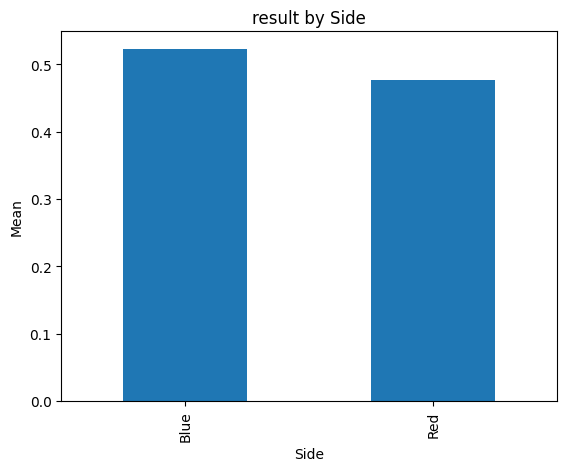

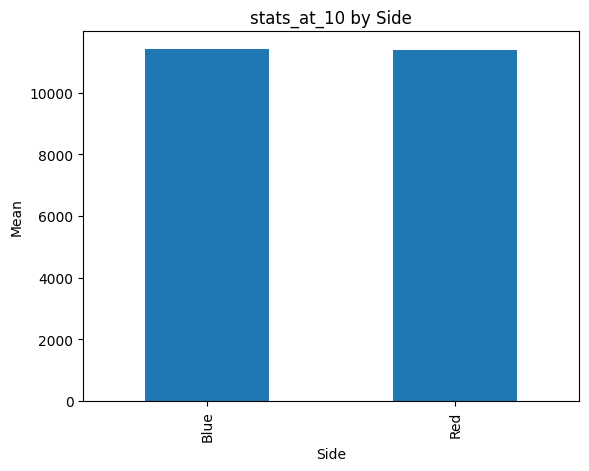

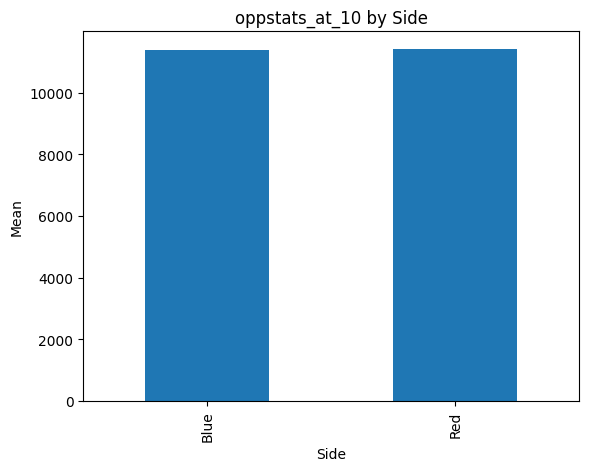

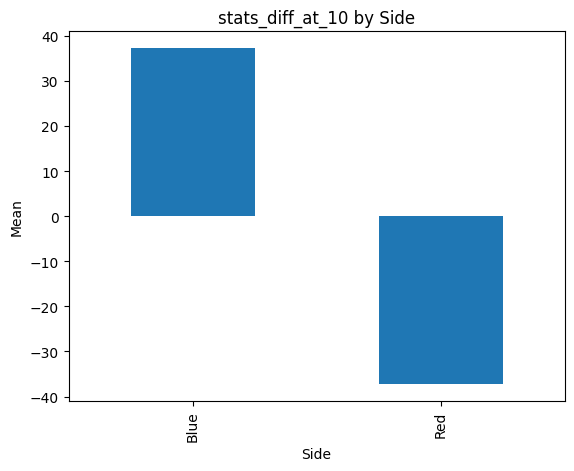

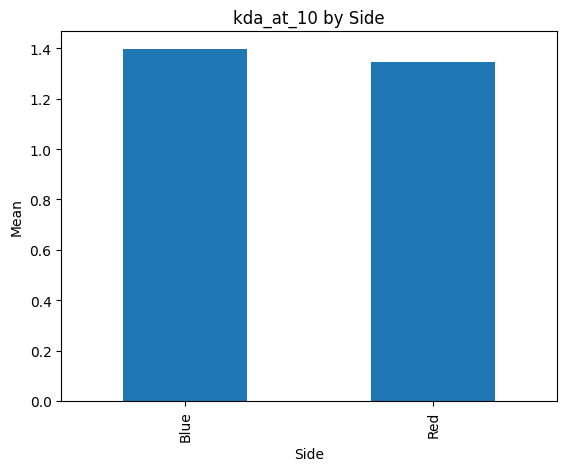

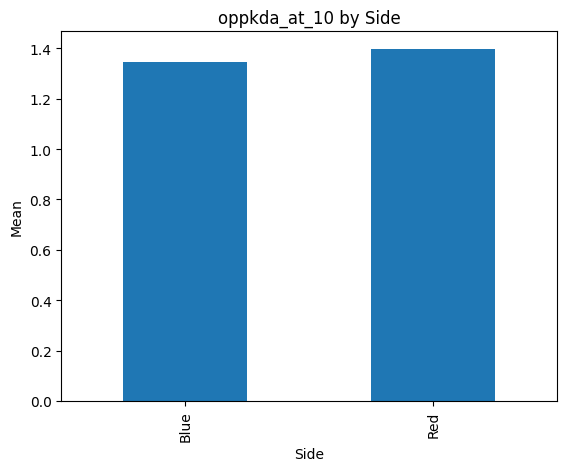

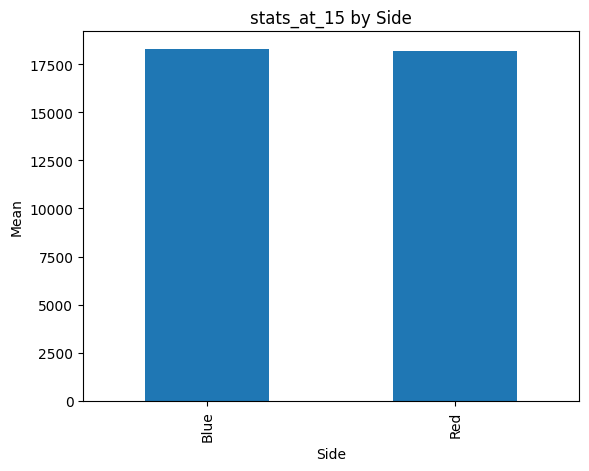

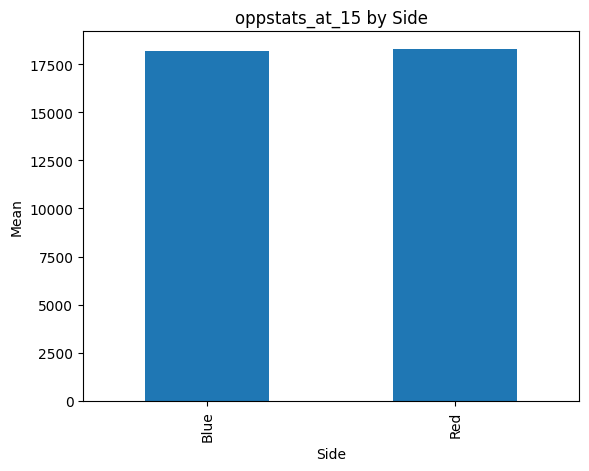

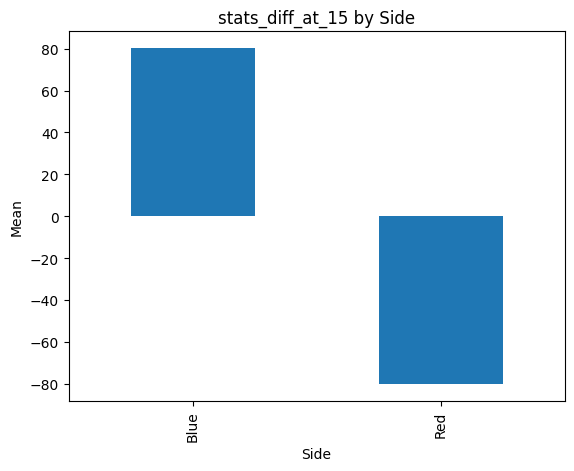

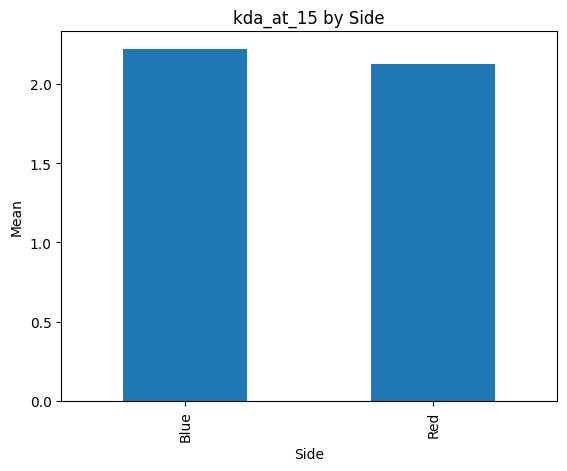

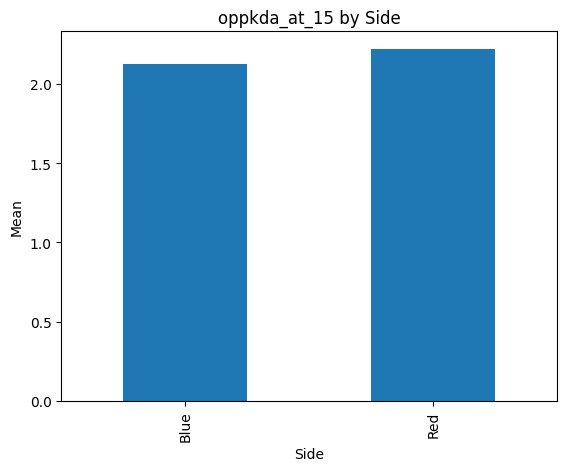

In [ ]:
#import matplotlib module and assign as plt
import matplotlib.pyplot as plt

#create for loop to print bar chart for all columns declared within summary_statistics
for col in summary_statistics.columns:
    #kind='bar' specifies creation of bar chart
    #legend=False hides markers in the chart
    summary_statistics[[col]].plot(kind='bar', legend=False)
    #title of bar chart
    plt.title(f'{col} by Side')
    #label y-axis as Mean
    plt.ylabel('Mean')
    #label x-axis as Side
    plt.xlabel('Side')
    #show plot
    plt.show()

Based on the bar charts above, it is observed that:
>
**1. Winrate, overall result (result)**
- Blue side displays a higher mean of 'result'. As mentioned in the beginning of the analysis, result=1 indicates a win whereas result=0 indicates a loss. Hence the greater the mean value of 'result', the higher the winrate (probability of winning).
>
Observation: Higher winrate on blue side.
>
[stats: statistics (gold + experience + creep score)]
>
**2. Statistics at 10 minute mark (stats_at_10)**
>
Observation: Almost identical statistics at 10 minute mark on both blue and red side.
>
**3. Opponent statistics at 10 minute mark (oppstats_at_10)**
>
Observation: Almost identical opponent statistics at 10 minute mark on both blue and red side.
>
**4. Statistical difference at 10 minute mark (stats_diff_at_10)**
>
Observation: Blue side has an overall positive mean value of statistical difference while red side has an overall negative mean value of statistical difference.
>
**5. Kill-Death-Assist Ratio at 10 minute mark (kda_at_10)**
>
Observation: Blue side has a greater mean value (approximately 1.4) as compared to that of red side (approximately 1.35).
>
**6. Opponent Kill-Death-Assist Ratio at 10 minute mark (oppkda_at_10)**
>
Observation: Red side has a greater mean value (approximately 1.4) than that of blue side (approximately 1.35).
>
**7. Statistics at 15 minute mark (stats_at_15)**
>
Observation: Almost identical statistics at 15 minute mark on both blue and red side.
>
**8. Opponent statistics at 15 minute mark (oppstats_at_15)**
>
Observation: Almost identical opponent statistics at 15 minute mark on both blue and red side.
>
**9. Statistical difference at 15 minute mark (stats_diff_at_15)**
>
Observation: Blue side has an overall positive mean value of statistical difference while red side has an overall negative mean value of statistical difference.
>
**10. Kill-Death-Assist Ratio at 15 minute mark (kda_at_15)**
>
Observation: Blue side has a greater mean value (approximately 2.3) as compared to that of red side (approximately 2.2).
>
**11. Opponent Kill-Death-Assist Ratio at 15 minute mark (oppkda_at_15)**
>
Observation: Red side has a greater mean value (approximately 2.3) than that of blue side (approximately 2.2).

### Scatter Plot Visualization

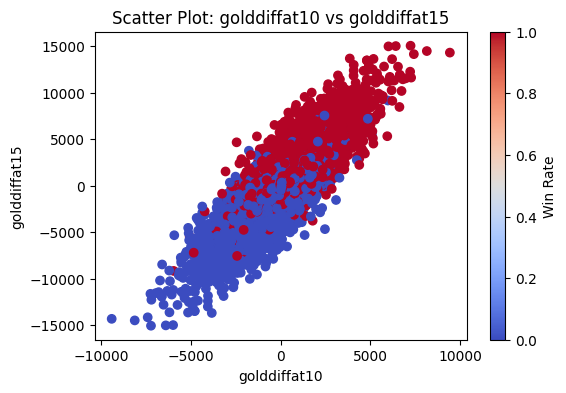

In [ ]:
#to visualize how gold difference at 10 minute mark and 15 minute mark affect winrate respectively

#set var1 and var2 to represent two columns of values
var1 = 'golddiffat10'
var2 = 'golddiffat15'

#configure size of figure
plt.figure(figsize=(6, 4))
#make scatter plot with values in columns specified by var1 and var 2 respectively
#colour (c) of each point is determined by the values in 'result' which can be either 1 or 0
#coolwarm colourmap used to map values to colours
#circular marker 'o' represents each point on the scatter plot
plt.scatter(df_c[var1], df_c[var2], c=df_c['result'], cmap='coolwarm', marker='o')
#title of scatter plot
plt.title(f'Scatter Plot: {var1} vs {var2}')
#label x-axis to column name specified as var1
plt.xlabel(var1)
#label y-axis to column name specified as var2
plt.ylabel(var2)
#add colour bar to scatter plot to as reference to values of 'result'
plt.colorbar(label='Win Rate')
#show scatter plot
plt.show()

The more positive the gold difference at both 10 and 15 minute marks, the greater the winrate.

Gold difference at both 10 and 15 minute marks are directly proportional to winrate.

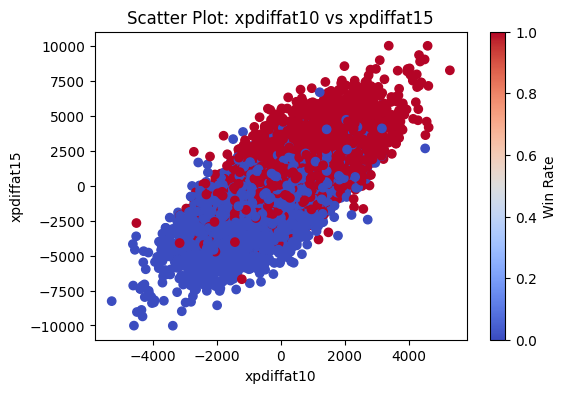

In [ ]:
#to visualize how difference in experience (xp) at 10 minute mark and 15 minute mark affect winrate respectively

var1 = 'xpdiffat10'
var2 = 'xpdiffat15'

plt.figure(figsize=(6, 4))
plt.scatter(df_c[var1], df_c[var2], c=df_c['result'], cmap='coolwarm', marker='o')
plt.title(f'Scatter Plot: {var1} vs {var2}')
plt.xlabel(var1)
plt.ylabel(var2)
plt.colorbar(label='Win Rate')
plt.show()

The more positive the difference in experience (xp) at both 10 and 15 minute marks, the greater the winrate.

Difference in experience (xp) at both 10 and 15 minute marks are directly proportional to winrate.

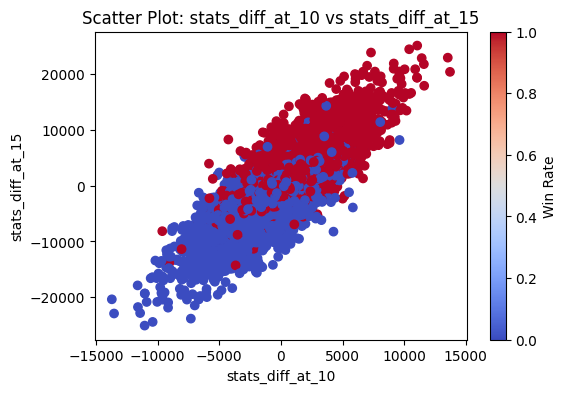

In [ ]:
#to visualize how statistical difference at 10 minute mark and 15 minute mark affect winrate respectively
#statistics: gold, experience, creep score

var1 = 'stats_diff_at_10'
var2 = 'stats_diff_at_15'

plt.figure(figsize=(6, 4))
plt.scatter(df_c[var1], df_c[var2], c=df_c['result'], cmap='coolwarm', marker='o')
plt.title(f'Scatter Plot: {var1} vs {var2}')
plt.xlabel(var1)
plt.ylabel(var2)
plt.colorbar(label='Win Rate')
plt.show()

(stats = statistics: gold + experience + creepscore)\

The more positive the statistical difference at both 10 and 15 minute marks, the greater the winrate.

Statistical difference at both 10 and 15 minute marks are directly proportional to winrate.


### Correlation Heatmap Visualization

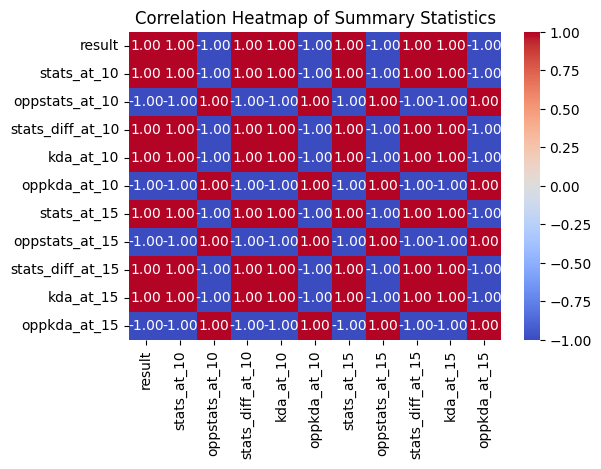

In [ ]:
#import seaborn module and assign as sns
import seaborn as sns
#adjust figure size
plt.figure(figsize=(6, 4))
#create heatmap for correlation between columns in summary_statistics
#annot stands for annotate, when true, it annotates each cell of the heatmap with a numeric value
#coolwarm colour map is used to show contrast (if any)
#fmt stands for format, .2f means 2 decimal places (as seen in heatmap plotted)
sns.heatmap(summary_statistics.corr(), annot=True, cmap='coolwarm', fmt='.2f')
#title
plt.title('Correlation Heatmap of Summary Statistics')
#show heatmap
plt.show()

All columns show perfect correlation between one another, this can be seen when all cells of the heatmap are displayed in dark red or blue.

We can see that these columns have perfect positive correlation (1.0) with 'result':
- Statistics at 10 minute mark (stats_at_10)
- Statistical difference at 10 minute mark (stats_diff_at_10)
- Kill-Death-Assist Ratio at 10 minute mark (kda_at_10)
- Statistics at 15 minute mark (stats_at_15)
- Statistical difference at 15 minute mark (stats_diff_at_15)
- Kill-Death-Assist Ratio at 15 minute mark (kda_at_15)
>
This means that these variables are directly proportional to a win (value of 'result' is 1).

In contrast, these columns are seen to have perfect negative correlation (-1.0) with 'result':
- Opponent statistics at 10 minute mark (oppstats_at_10)
- Opponent Kill-Death-Assist Ratio at 10 minute mark (oppkda_at_10)
- Opponent statistics at 15 minute mark (oppstats_at_15)
- Opponent Kill-Death-Assist Ratio at 15 minute mark (oppkda_at_15)
>
This means that these variables are directly proportional to a loss (value of 'result' is 0).

# Step 10: Conclusion

In this analysis of a 2022 League of Legends Esports dataset, we explored the relationship between variables such as:
- side selection (red or blue)
- statistics (gold + experience + creep score) at 10 and 15 minute marks  

and outcome of matches:
- result (win or loss)

[stats/statistics: gold + experience + creep score]

[result: 1=win, 0=loss]

[mean value of 'result' is directly proportional to winrate]

**Key Findings, Insights and Trends:**
- Blue side has an overall greater winrate than red side
- At both 10 and 15 minute marks, teams playing on blue side have overall positive mean value of statistical difference whereas teams playing on the red side have overall negative mean value of statistical difference
- At both 10 and 15 minute marks, blue side has greater kill-death-assist (kda) ratio than that of red side
- Gold difference at both 10 and 15 minute marks are directly proportional to winrate.
- Difference in experience (xp) at both 10 and 15 minute marks are directly proportional to winrate.
- Statistical difference at both 10 and 15 minute marks are directly proportional to winrate.

**How can this dataset be leveraged for decision-making processes?**

In the League of Legends E-sports scene, in a best-of matchup (best-of-3 or best-of-5), whenever a team loses a game, they have priority of side selection for the subsequent game. This dataset has proven that blue side has an overall greater winrate than that of red side, hence professional League of Legends teams can use this to their advantage to pick the blue side whenever they are given the priority of side selection as this can positively impact their tournament outcome.

**What type of Machine learning problems, e.g. classification / clustering / regression is suitable for the dataset and decision-making?**

Based on my analysis of this 2022 League of Legends Esports dataset, the most suitable type of machine learning problem for this dataset and decision-making processes is a classification problem.

Here are my reasonings:-
1. The target variable in this analysis is the 'result,' which indicates win or loss of a match. This is a binary variable (1 for win, 0 for loss), making it a classification problem.
2. As aforementioned, the decision-making process in professional play involves leveraging the dataset to inform side selection decisions, to predict the likelihood of winning a match based on factors such as side selection and statistics at 10 and 15 minute marks.
3. The key findings suggest that certain features (such as side selection, gold difference, difference in experiences, statistical differences) are directly proportional to winrate.
Therefore, the objective is to build a classification model that can predict the probability of winning based on these features.
4. Classification algorithms such as logistic regression, decision trees, random forests, or support vector machines can be employed to model the relationship between the specific input features and the binary outcome (win or loss).
5. The trained classification model can serve as a decision support tool for professional League of Legends teams when they have the priority of side selection. Teams can use the model predictions to inform their decision on whether to choose the blue side, which has shown an overall greater winrate.

My choice of a classification problem is to leverage machine learning to enhance strategic decision-making based on historical match data and statistical patterns.


In [ ]:
df_c.to_csv('C:/Users/alowj/Documents/23051818_AllisonLowOCC1_IDS_Assignment/cleaned_2022LolEsports_Dataset.csv', index=False)